Epoch 1/50
46/46 [==============================] - 33s 84ms/step - loss: 12687.7172
Epoch 2/50
46/46 [==============================] - 4s 84ms/step - loss: 11258.7337
Epoch 3/50
46/46 [==============================] - 4s 80ms/step - loss: 10716.0753
Epoch 4/50
46/46 [==============================] - 4s 82ms/step - loss: 10242.6101
Epoch 5/50
46/46 [==============================] - 4s 82ms/step - loss: 9783.3381
Epoch 6/50
46/46 [==============================] - 4s 79ms/step - loss: 9341.7122
Epoch 7/50
46/46 [==============================] - 4s 81ms/step - loss: 8857.2655
Epoch 8/50
46/46 [==============================] - 4s 82ms/step - loss: 8490.3652
Epoch 9/50
46/46 [==============================] - 4s 85ms/step - loss: 8069.3183
Epoch 10/50
46/46 [==============================] - 4s 85ms/step - loss: 7663.7016
Epoch 11/50
46/46 [==============================] - 4s 85ms/step - loss: 7231.4377
Epoch 12/50
46/46 [==============================] - 4s 80ms/step - loss: 6872.0

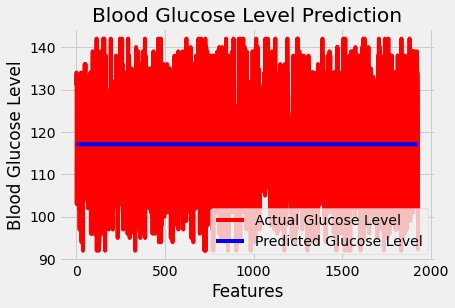

The root mean squared error is 12.481358600589202.


INFO:tensorflow:Assets written to: C:\Users\Vaishali\AppData\Local\Temp\tmp9qh3trqe\assets


INFO:tensorflow:Assets written to: C:\Users\Vaishali\AppData\Local\Temp\tmp9qh3trqe\assets


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import csv

dataset=pd.read_csv('Final_Data_Regression.csv')
x,y=train_test_split(dataset,test_size=0.3,random_state=4)
x.to_csv('training.csv')
y.to_csv('testing.csv')

def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Actual Glucose Level')
    plt.plot(predicted, color='blue',label='Predicted Glucose Level')
    plt.title('Blood Glucose Level Prediction')
    plt.xlabel('Features')
    plt.ylabel('Blood Glucose Level')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

dataset = pd.read_csv('training.csv')

dataset_test=pd.read_csv('testing.csv')



data=dataset.to_numpy()
X_train=data[:data.shape[0],:-1]
y_train=data[:data.shape[0],-1]

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

data2=dataset_test.to_numpy()
X_test=data2[:data2.shape[0],:-1]
y_test=data2[:data2.shape[0],-1]

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1))))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=100)


predicted_glucose_level = regressor.predict(X_test)
plot_predictions(y_test,predicted_glucose_level)
return_rmse(y_test,predicted_glucose_level)


converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
tflite_model = converter.convert()

with open('BI_LSTMRegression.tflite', 'wb') as f:
  f.write(tflite_model)


